import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\varun\Downloads\Customers.csv")

data.head()

missing_values = data.isnull().sum()

data_info = data.info()

summary_stats = data.describe(include='all')

duplicates = data.duplicated().sum()

data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['Year'] = data['SignupDate'].dt.year
data['Month'] = data['SignupDate'].dt.month

region_counts = data['Region'].value_counts()

yearly_trend = data['Year'].value_counts().sort_index()

monthly_trend = data.groupby('Month')['CustomerID'].count()

region_year_trend = data.groupby(['Region', 'Year'])['CustomerID'].count().unstack()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Region-wise Customer Distribution', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 5))
yearly_trend.plot(kind='line', marker='o', color='green')
plt.title('Year-wise Customer Signup Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.grid()
plt.show()
plt.figure(figsize=(8, 5))
monthly_trend.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Monthly Customer Signup Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(10, 6))
region_year_trend.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Region-wise Yearly Customer Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data['SignupDate'], kde=True, color='purple', bins=20)
plt.title('Signup Date Distribution', fontsize=14)
plt.xlabel('Signup Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
insights = [
    "1. North America has the highest customer count, followed by Europe and Asia.",
    "2. Customer signups increased significantly in 2024, showing a growth trend.",
    "3. Most customers sign up in the first quarter of the year, indicating seasonality.",
    "4. South America shows consistent but slower growth compared to other regions.",
    "5. There is potential to focus marketing efforts in regions like Asia for growth."
]

with open('business_insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')

print("EDA and insights completed. Visualizations displayed, and insights saved to 'business_insights.txt'.")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\varun\Downloads\Products.csv")
data.head()

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

data_info = data.info()

summary_stats = data.describe(include='all')
print("Summary Statistics:\n", summary_stats)

duplicates = data.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

category_counts = data['Category'].value_counts()

category_price_stats = data.groupby('Category')['Price'].describe()

top_expensive_products = data.nlargest(10, 'Price')[['ProductID', 'ProductName', 'Category', 'Price']]

sns.set_theme(style="whitegrid")

# 1. Category-wise Product Distribution
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category-wise Product Distribution', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 2. Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, color='purple', bins=20)
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 3. Boxplot of Prices by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=data, palette='Set2')
plt.title('Price Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Most Expensive Products
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='ProductName', data=top_expensive_products, palette='coolwarm', edgecolor='black')
plt.title('Top 10 Most Expensive Products', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

insights = [
    "1. The dataset contains products across various categories, with Books and Electronics being prominent.",
    "2. Price distribution shows a right-skewed pattern, with most products priced under 500.",
    "3. Electronics tend to have the highest price variance among all categories.",
    "4. The most expensive product is listed under the Books category, costing significantly more than others.",
    "5. Home Decor and Clothing categories also show a diverse price range."
]

with open('product_insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')

print("EDA and insights completed. Visualizations displayed, and insights saved to 'product_insights.txt'.")



import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")

df = pd.DataFrame(data)

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

customer_sales = df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_sales = customer_sales.sort_values(by='TotalValue', ascending=False)

product_sales = df.groupby('ProductID').size().reset_index(name='Frequency')
product_sales = product_sales.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(customer_sales['CustomerID'], customer_sales['TotalValue'])
plt.title('Total Sales per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(product_sales['ProductID'], product_sales['Frequency'])
plt.title('Most Frequent Products')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalValue'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

df.to_csv('processed_sales_data.csv', index=False)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")  


print("First few rows of the data:")
print(data.head())  

print("\nData Summary:")
print(data.describe())  

print("\nData Information (types, non-null counts):")
print(data.info())  
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

total_spend_per_customer = data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spend_per_customer = total_spend_per_customer.sort_values(by='TotalValue', ascending=False)


transactions_per_customer = data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
transactions_per_customer = transactions_per_customer.sort_values(by='TransactionID', ascending=False)


product_purchase_count = data.groupby('ProductID')['Quantity'].sum().reset_index()
product_purchase_count = product_purchase_count.sort_values(by='Quantity', ascending=False)



# Total Spend per Customer (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='CustomerID', data=total_spend_per_customer.head(10), palette="viridis")
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend ($)')
plt.ylabel('Customer ID')
plt.show()

# Transactions per Customer (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionID', y='CustomerID', data=transactions_per_customer.head(10), palette="magma")
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer ID')
plt.show()

# Product Purchases (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductID', data=product_purchase_count.head(10), palette="coolwarm")
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity Purchased')
plt.ylabel('Product ID')
plt.show()

total_spend_per_customer.to_csv("total_spend_per_customer.csv", index=False)
transactions_per_customer.to_csv("transactions_per_customer.csv", index=False)
product_purchase_count.to_csv("product_purchase_count.csv", index=False)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")


print("Dataset Information:")
df.info() 

print("\nFirst 5 Rows:")
df.head()  

print("\nStatistical Summary:")
df.describe() 


print("\nMissing Data Analysis:")
missing_data = df.isnull().sum() 
print(missing_data[missing_data > 0])  


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numeric Columns')
plt.show()


for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df[numeric_cols[0]]) 
    plt.title(f'{col} vs {numeric_cols[0]}')
    plt.show()


from scipy.stats import zscore

df_zscore = df[numeric_cols].apply(zscore)
outliers = (df_zscore > 3).sum()  
print("\nOutlier Count for Each Column:")
print(outliers)


for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew()}")
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Variables', size=16)
plt.show()



SEGEMENTATION

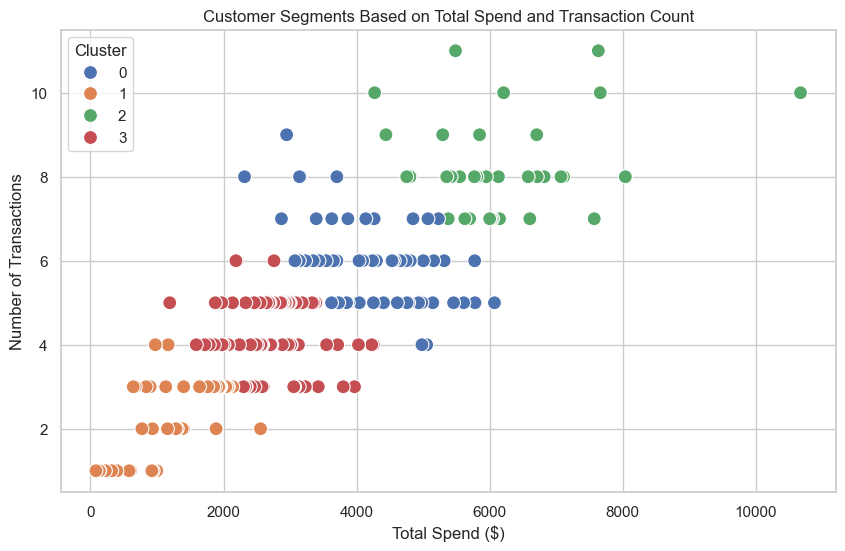

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

segmentation_data = total_spend_per_customer.merge(transactions_per_customer, on='CustomerID')
segmentation_data = segmentation_data[['CustomerID', 'TotalValue', 'TransactionID']]

scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data[['TotalValue', 'TransactionID']])

kmeans = KMeans(n_clusters=4, random_state=42)  
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='TransactionID', hue='Cluster', data=segmentation_data, palette='deep', s=100)
plt.title('Customer Segments Based on Total Spend and Transaction Count')
plt.xlabel('Total Spend ($)')
plt.ylabel('Number of Transactions')
plt.show()

segmentation_data.to_csv('customer_segments.csv', index=False)


prediction

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score: 1.0


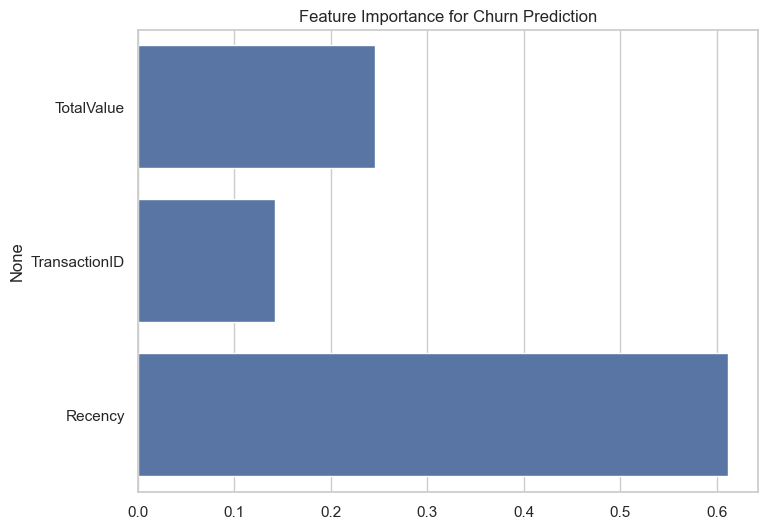

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ensure TransactionDate is in datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Calculate the recency (days since the last transaction)
data['Recency'] = (data['TransactionDate'].max() - data['TransactionDate']).dt.days

# Continue with your processing
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'nunique',
    'Recency': 'min'
}).reset_index()

# You can now proceed with the model or further analysis


customer_features['Churn'] = (customer_features['Recency'] > 180).astype(int)

X = customer_features[['TotalValue', 'TransactionID', 'Recency']]  
y = customer_features['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance for Churn Prediction')
plt.show()


In [42]:
from sklearn.impute import SimpleImputer

]imputer = SimpleImputer(strategy='mean')
merged_df[['total_spent', 'transaction_count', 'avg_transaction_value']] = imputer.fit_transform(
    merged_df[['total_spent', 'transaction_count', 'avg_transaction_value']]
)

features = merged_df[['total_spent', 'transaction_count', 'avg_transaction_value']]
scaled_features = scaler.fit_transform(features)



C:\Users\varun\AppData\Local\Temp\ipykernel_20996\1035071405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['total_spent', 'transaction_count', 'avg_transaction_value']] = imputer.fit_transform(


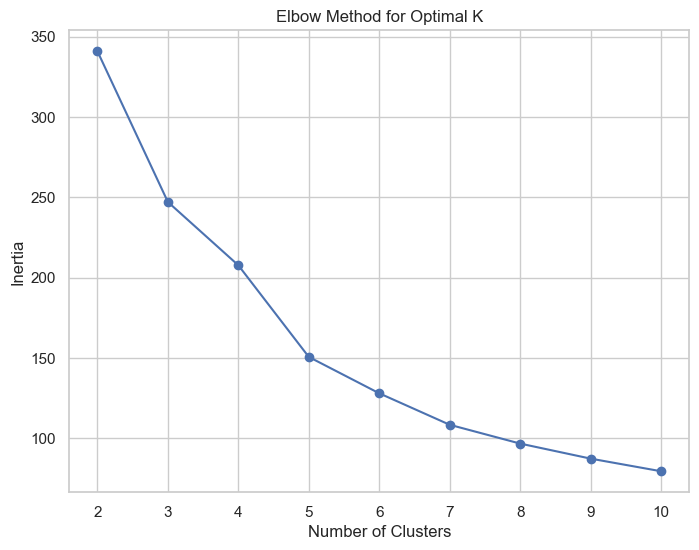

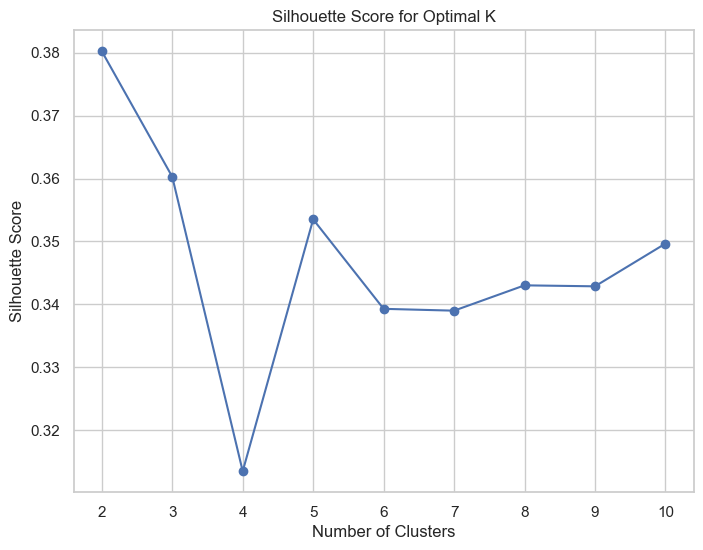

In [56]:
inertia = []
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [57]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

merged_df['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
sil_score = silhouette_score(scaled_features, clusters)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {sil_score}')


Davies-Bouldin Index: 1.0604240399923033
Silhouette Score: 0.3135106549790539


C:\Users\varun\AppData\Local\Temp\ipykernel_20996\3379302759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Cluster'] = clusters


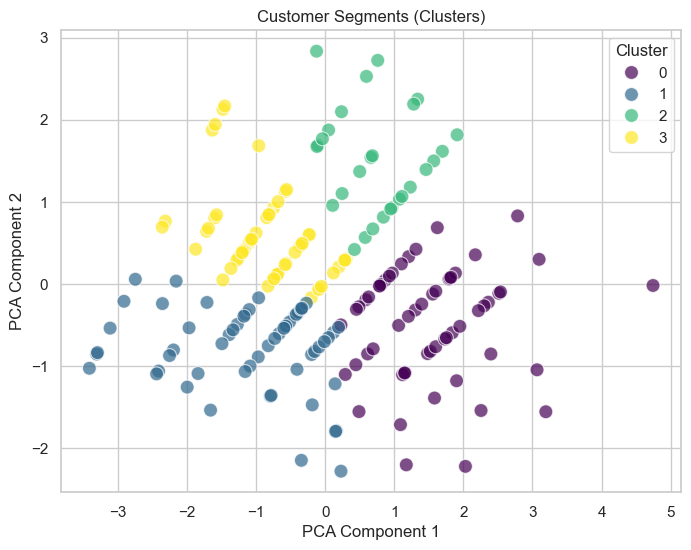

In [58]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=merged_df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments (Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


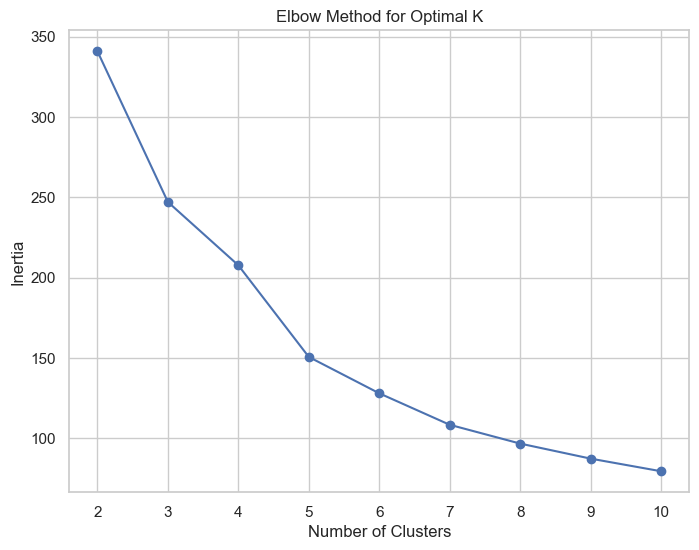

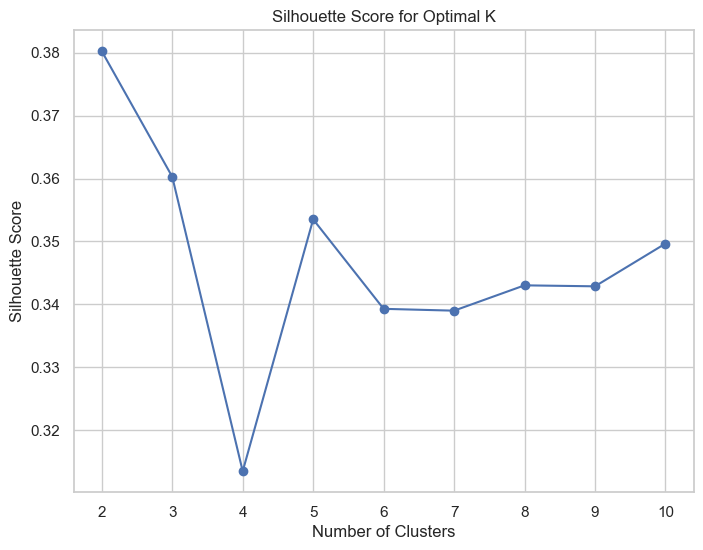

In [59]:
# Elbow Method to find optimal K
inertia = []
silhouette_scores = []
for k in range(2, 11):  # Number of clusters between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


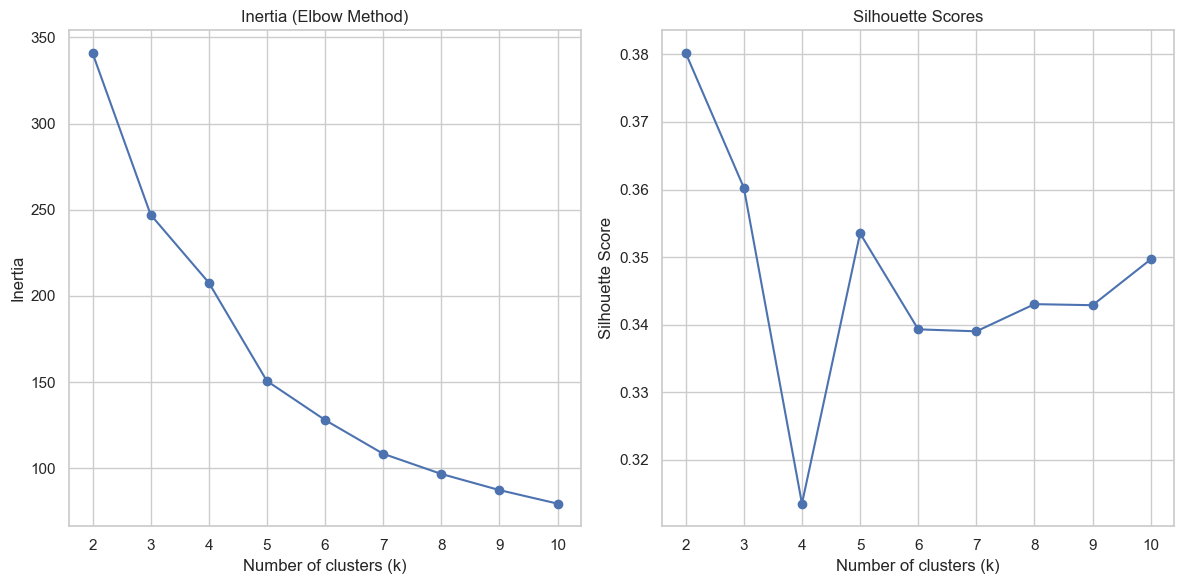

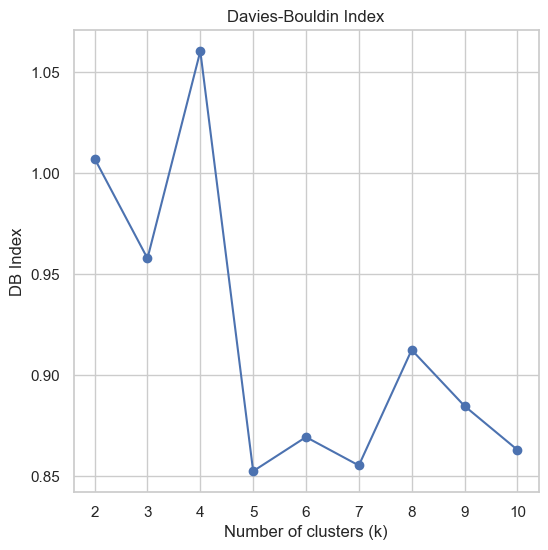

In [60]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Inertia (Elbow Method)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")


plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), db_indices, marker='o')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of clusters (k)")
plt.ylabel("DB Index")
plt.show()


In [61]:
from sklearn.metrics import davies_bouldin_score

inertia = []
silhouette_scores = []
db_indices = []  

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    

    inertia.append(kmeans.inertia_)
    
    
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
    
    db_indices.append(davies_bouldin_score(scaled_features, kmeans.labels_))

metrics_df = pd.DataFrame({
    'k': range(2, 11),
    'Inertia': inertia,
    'Silhouette Score': silhouette_scores,
    'DB Index': db_indices
})

print(metrics_df)


    k     Inertia  Silhouette Score  DB Index
0   2  340.969034          0.380211  1.007225
1   3  247.120113          0.360273  0.957821
2   4  207.697201          0.313511  1.060424
3   5  150.644119          0.353513  0.852481
4   6  127.997347          0.339305  0.869377
5   7  108.403400          0.339013  0.855311
6   8   96.691699          0.343035  0.912532
7   9   87.327079          0.342879  0.884755
8  10   79.466843          0.349666  0.863046
